## Basic demonstration of sansmic
The following examples show a withdrawal of 1 MMbbl from an approx. 10 MMbbl cavern over 10 days, followed by a 45 day rest period. The first example shows how to load and run from an existing DAT-format file. The second example shows how to build the same scenario from scratch.

### Setup
After installing sansmic, import the ``sansmic`` module. If you need other packages, import them as well.

In [1]:
import sansmic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Using an existing SANSMIC DAT file

If you have an existing file, such as the provided example called ``old.dat``, then you can just read it in to create a new scenario object. You can look at the object in dictionary format to see how it was imported.

In [2]:
# Read in the old .DAT file
test1scen = sansmic.io.read_scenario('old.dat')

# write a new-style TOML file and print it to check it out
sansmic.io.write_scenario(test1scen, 'converted.toml')
with open('converted.toml', 'r') as fin:
    for line in fin.readlines():
        print(line.strip())

title = 'Converted from old.dat'
num-cells = 200
geometry-data.radii = [50.0, 90.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0,

To run the simulation in batch mode, simply create a new simulation and then run it. The results are stored in the ``results`` attribute of the simulation object.

In [3]:
with test1scen.new_simulation('converted') as sim1:
    sim1.run_sim()
test1results = sim1.results

<Axes: xlabel='save_idx'>

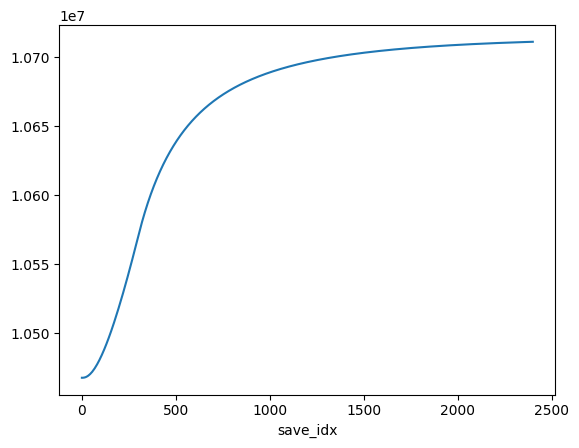

In [4]:
test1results.df_t_1D.V_cav.plot()

In [5]:
test2scen = sansmic.Scenario(
    title="Simple example",
    cavern_height=2000.0,  # z-domain = [0, 1000] ft
    floor_depth=4000.0,    # TD = 4000 ft MD
    num_cells=200,         # 200 cells (10 ft high)
)
test2scen.insolubles_ratio = 0.04
test2scen.geometry_format = sansmic.model.GeometryFormat.RADIUS_LIST
radii = np.array([100]*201)  # 100 ft radius for the bulk of the cavern
radii[0] = 50
radii[1] = 90
radii[187] = 88
radii[188] = 45
radii[189] = 15
radii[190] = 8
radii[191] = 5
radii[192:] = 2


Having the geometry data in the data structure makes it cumbersome to view it. So let's save the data in a file instead.

In [6]:
# If you wanted to keep the data directly with the configuration, 
# you would uncomment the line below and comment out the rest.
#
# test2scen.geometry_data = dict(radii=radii.tolist())

with open('scratch.geom', 'w') as fout:
    for v in radii:
        fout.write('{}\n'.format(v))
test2scen.geometry_data = "scratch.geom"

Now we add a leaching stage. Remeber that when creating a new stage it automatically adds it also.

In [7]:
stage1 = test2scen.new_stage()

Now we setup up the simulation stage. Note - in this example we will set up a timestep that is ten times larger (0.1 h) than the old data file so that we can see the differences, if any.

In [8]:
stage1.title = "Found a bug - have to have a title?"
stage1.simulation_mode = 'withdrawal'
stage1.brine_injection_sg = 1.003     # sg
stage1.brine_injection_rate = 100000  # bbl/d
stage1.brine_injection_depth = 15  # ft MD
stage1.brine_interface_depth = 37   # ft MD
stage1.injection_duration = 360       # h
stage1.rest_duration = 2520           # h
stage1.inner_tbg_inside_diam = 9.85    # in
stage1.inner_tbg_outside_diam = 10.75 # in
stage1.outer_csg_inside_diam = 9.85  # in
stage1.outer_csg_outside_diam = 10.75 # in
stage1.set_cavern_sg = 1.2019         # starting cavern SG
stage1.solver_timestep = 0.1          # h
stage1.save_frequency = 120           # timesteps (120 ts x 0.1 h/ts = 12 h)

Let's save this new scenario in a TOML file, and then read it back in to see how it was formatted.

In [9]:
sansmic.io.write_scenario(test2scen, 'scratch.toml')
with open('scratch.toml', 'r') as fin:
    for line in fin.readlines():
        print(line.strip())

title = 'Simple example'
num-cells = 200
geometry-data = 'scratch.geom'
geometry-format = 'radius-list'
cavern-height = 2000.0
floor-depth = 4000.0
ullage-standoff = 40
insolubles-ratio = 0.04
units = 'ft-in-bbl'

[[stages]]
title = 'Found a bug - have to have a title?'
simulation-mode = 'withdrawal'
solver-timestep = 0.1
save-frequency = 120
injection-duration = 360
rest-duration = 2520
inner-tbg-inside-diam = 9.85
inner-tbg-outside-diam = 10.75
outer-csg-inside-diam = 9.85
outer-csg-outside-diam = 10.75
brine-injection-sg = 1.003
brine-injection-depth = 15
brine-injection-rate = 100000
set-cavern-sg = 1.2019
brine-interface-depth = 37


Now let's run this simulation through a python iterator. This allows us to pull out results at any time we want to request them by using the ``get_current_state`` function.

In [10]:
with test2scen.new_simulation('scratch', verbosity=1) as sim2:
    print("""         t_d        V_inj        V_cav       sg_ave""")
    print("""      ------  -----------  -----------  -----------""")
    for stage, step in sim2.steps:
        if step % 2400 == 0:
            res = sim2.get_current_state()
            print(res.df_t_1D.loc[:,['t_d', 'V_inj', 'V_cav', 'sg_ave']].to_string(header=False, float_format='%12.4g', index=False))
test2results = sim2.results

         t_d        V_inj        V_cav       sg_ave
      ------  -----------  -----------  -----------
          10        1e+06    1.052e+07        1.093
          20      1.5e+06    1.061e+07        1.137
          30      1.5e+06    1.066e+07        1.166
          40      1.5e+06    1.068e+07         1.18
          50      1.5e+06    1.069e+07        1.187
          60      1.5e+06     1.07e+07        1.192
          70      1.5e+06     1.07e+07        1.195
          80      1.5e+06     1.07e+07        1.197
          90      1.5e+06    1.071e+07        1.198
         100      1.5e+06    1.071e+07        1.199
         110      1.5e+06    1.071e+07          1.2
         120      1.5e+06    1.071e+07        1.201


<Axes: xlabel='save_idx'>

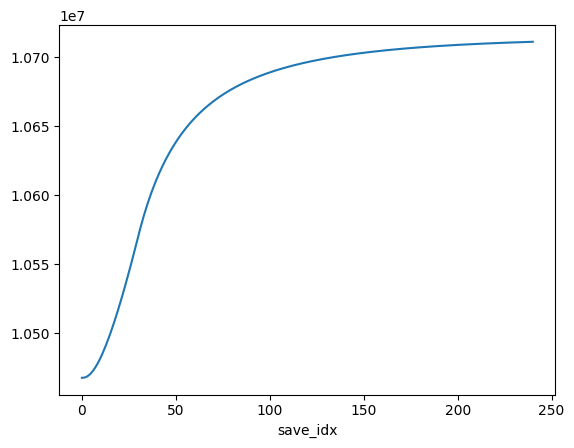

In [11]:
test2results.df_t_1D.V_cav.plot()

<Axes: xlabel='t_d'>

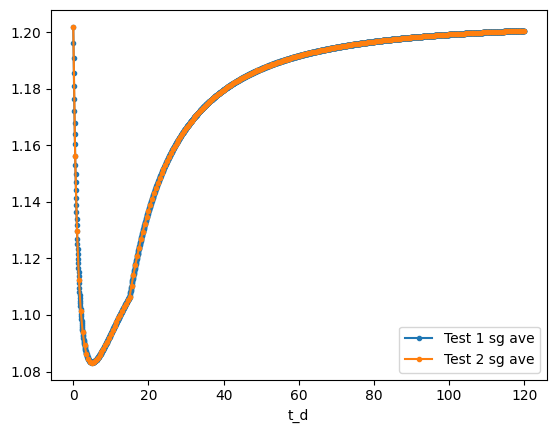

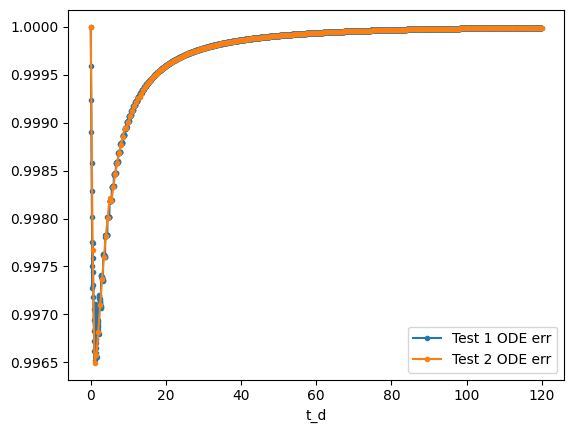

In [12]:
ax1 = test1results.df_t_1D.plot(y='sg_ave', x='t_d', label='Test 1 sg ave', marker='.')
ax2 = test1results.df_t_1D.plot(y='err_ode', x='t_d', label='Test 1 ODE err', marker='.')
test2results.df_t_1D.plot(ax=ax1, y='sg_ave', x='t_d', label='Test 2 sg ave', marker='.')
test2results.df_t_1D.plot(ax=ax2, y='err_ode', x='t_d', label='Test 2 ODE err', marker='.')

## Running from the command line
Jupyter is not a great way to demonstrate how to run sansmic from the command line; however, it is still possible to do so. The following code simulates the execution of the following command:

``sansmic old.dat -o cmdlineTest --no-json --no-hdf``

Try adding "-v" or "-vv" at the end of the list to see the difference.

In [13]:
import sansmic.app
resultsCmdLine = sansmic.app.main(['old.dat','-o','cmdlineTest','--no-json','--no-hdf',], ret=True)

Running sansmic in batch mode from 
Initial and final results:
  t_d  stage       z_obi  h_insol     V_inj        V_fill        V_cav  sg_ave
  0.0      0 4000.000000 0.000000       0.0  0.000000e+00 1.046745e+07 1.20190
120.0      1 3704.197391 6.966223 1500000.0 -1.471659e+06 1.071106e+07 1.20052


In [14]:
resultsCmdLine.df_t_1D.loc[[0,len(resultsCmdLine.time)-1]].to_dict()

{'t_h': {0: 0.0, 2400: 2880.0},
 't_d': {0: 0.0, 2400: 120.0},
 'step': {0: 0, 2400: 287999},
 'stage': {0: 0, 2400: 1},
 'phase': {0: 1, 2400: 0},
 'i_inj': {0: 1, 2400: 1},
 'i_prod': {0: 1, 2400: 31},
 'i_plume': {0: 1, 2400: 30},
 'i_obi': {0: 1, 2400: 31},
 'err_ode': {0: 1.0, 2400: 0.99999146049182},
 'z_inj': {0: 4000.0, 2400: 4000.0},
 'z_prod': {0: 4000.0, 2400: 3700.0},
 'z_plume': {0: 4000.0, 2400: 3710.0},
 'z_obi': {0: 4000.0, 2400: 3704.19739065728},
 'z_insol': {0: 4000.0, 2400: 3993.0337774971404},
 'h_insol': {0: 0.0, 2400: 6.966222502859532},
 'l_jet': {0: 0.0, 2400: 6.140078785170936},
 'u_jet': {0: 0.0, 2400: 0.05486634493504741},
 'r_jet': {0: 0.0, 2400: 6.140078785170936},
 'V_inj': {0: 0.0, 2400: 1500000.0000004503},
 'V_fill': {0: 0.0, 2400: -1471659.4038017266},
 'V_cav': {0: 10467450.064262731, 2400: 10711057.071965564},
 'V_insol': {0: 0.0, 2400: 9744.727319445823},
 'V_vented': {0: 0.0, 2400: 0.43101456580737374},
 'Q_out': {0: 0.0, 2400: -11.187399376411827

## Multi-stage model
Now, let's try running a model with several leaching stages. Consider the following scenario:

A site is delivering 5 MMbbl of oil as ten 500 Mbbl cargos (taking 20 hours to deliver each cargo). There are two days of downtime between deliveries. 
The stream is blended between three different caverns, and our cavern of interest is only responsible for delivering 7500 bbl/h. The starting geometry
will be the one we put in "scratch.geom", earlier. At the end, we will give the cavern an additional 90 days to equilibrate.

In [15]:
tenCargos = sansmic.Scenario(
    title="Simple example",
    cavern_height=2000.0,  # z-domain = [0, 1000] ft
    floor_depth=4000.0,  # TD = 4000 ft MD
    num_cells=200,  # 200 cells (10 ft high)
)
tenCargos.insolubles_ratio = 0.04
tenCargos.geometry_format = sansmic.model.GeometryFormat.RADIUS_LIST
tenCargos.geometry_data = "scratch.geom"

# Set some of these as default values for each stage
tenCargos.defaults = dict(
    inner_tbg_inside_diam = 9.85, # in
    inner_tbg_outside_diam = 10.75,  # in
    outer_csg_inside_diam = 9.85,  # in
    outer_csg_outside_diam = 10.75,  # in
    solver_timestep = 0.1, # h
    save_frequency = 10,  # save every hour
)

for i in range(10):
    stage = tenCargos.new_stage()
    stage.title = "Cargo number {}".format(i)
    stage.simulation_mode = "withdrawal"
    stage.brine_injection_sg = 1.003  # sg
    stage.brine_injection_rate = 7500 * 24  # bbl/h * 24 h/d
    stage.brine_injection_depth = 15
    stage.injection_duration = 20  # h
    stage.rest_duration = 4 + 24 * 2  # two days downtime plus the four hours
    if i == 0:
        # We only want to set these on the first stage, after that we want
        # to use what was calculated previously (i.e., leave the values None)
        stage.brine_interface_depth = 37 # ft MD starting
        stage.set_cavern_sg = 1.2019  # starting cavern SG
    if i == 9:
        # add an extra 60 days to the end
        stage.rest_duration = stage.rest_duration + 90 * 24

sansmic.io.write_scenario(tenCargos, "tenCargos.toml")

# run the model
with tenCargos.new_simulation("tenCargos", verbosity=0) as sim3:
    sim3.run_sim()
tenCargoResults = sim3.results

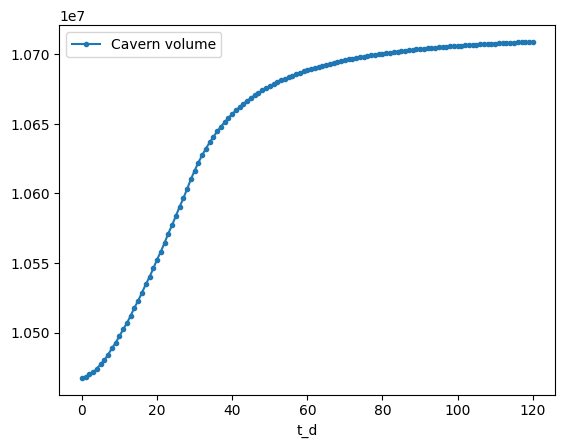

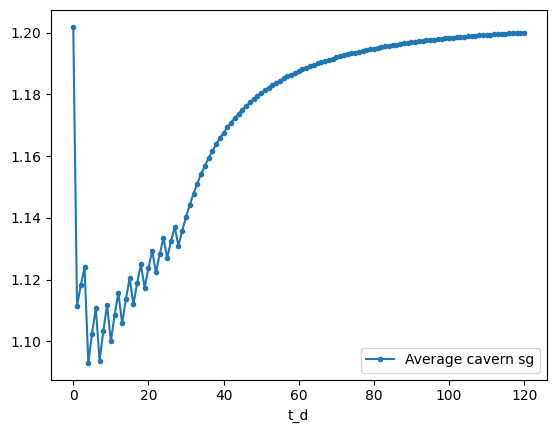

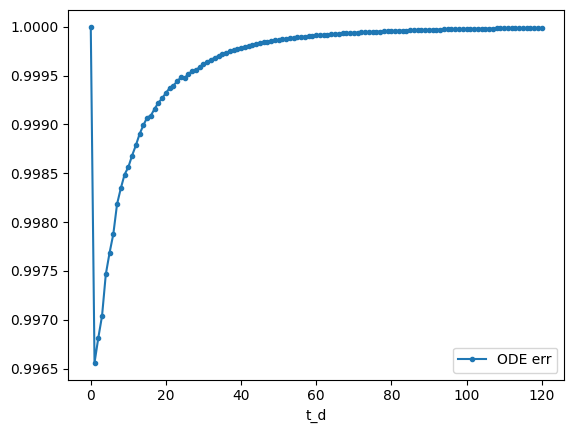

In [16]:
# plot some overview statistics for performance analysis
ax0 = tenCargoResults.df_t_1D.plot(y='V_cav', x='t_d', label='Cavern volume', marker='.')
ax1 = tenCargoResults.df_t_1D.plot(y='sg_ave', x='t_d', label='Average cavern sg', marker='.')
ax2 = tenCargoResults.df_t_1D.plot(y='err_ode', x='t_d', label='ODE err', marker='.')

### Comparing the ten-cargo simulation to the all-at-once simulation
You may have noticed that all of the different simulations have resulted in a 1.5 million barrel withdrawal from the cavern. Now we can compare the results of splitting the injection into ten cargos compared to the results if all 1.5 million barrels of raw water were injected all at once. First, we can look at the final results in a table.

In [17]:
pd.DataFrame.from_dict({'single-inject': resultsCmdLine.df_t_1D.iloc[-1,:], 'ten-cargos': tenCargoResults.df_t_1D.iloc[-1,:], 'diff': resultsCmdLine.df_t_1D.iloc[-1,:] - tenCargoResults.df_t_1D.iloc[-1,:]})

,single-inject,ten-cargos,diff
t_h,2.880000e+03,2.880000e+03,0.000000e+00
t_d,1.200000e+02,1.200000e+02,0.000000e+00
step,2.879990e+05,2.231900e+04,2.656800e+05
stage,1.000000e+00,1.000000e+01,-9.000000e+00
phase,0.000000e+00,0.000000e+00,0.000000e+00
i_inj,1.000000e+00,1.000000e+00,0.000000e+00
i_prod,3.100000e+01,3.100000e+01,0.000000e+00
i_plume,3.000000e+01,3.000000e+01,0.000000e+00
i_obi,3.100000e+01,3.100000e+01,0.000000e+00
err_ode,9.999915e-01,9.999883e-01,3.133212e-06


The final results look very close. Most of the differences are much less than the absolute values except for the jet length, which *should* be different since there are vastly different velocities involved. So, how does the timeseries of changes look?

Text(0.5, 0, 'Time (d)')

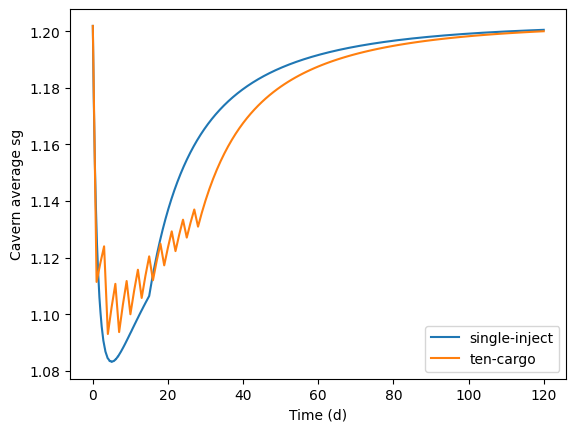

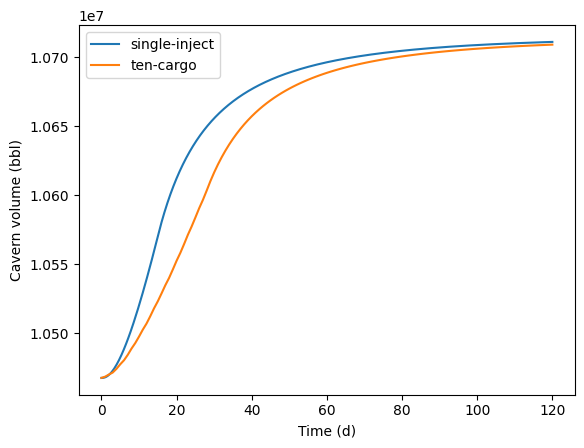

In [18]:
ax = resultsCmdLine.df_t_1D.plot(x='t_d', y='sg_ave', label='single-inject')
tenCargoResults.df_t_1D.plot(ax=ax, x='t_d', y='sg_ave', label='ten-cargo')
ax.set_ylabel('Cavern average sg')
ax.set_xlabel('Time (d)')
ax = resultsCmdLine.df_t_1D.plot(x='t_d', y='V_cav', label='single-inject')
tenCargoResults.df_t_1D.plot(ax=ax, x='t_d', y='V_cav', label='ten-cargo')
ax.set_ylabel('Cavern volume (bbl)')
ax.set_xlabel('Time (d)')

Finally, let's take a look at the final cavern shape. We can do this by plotting the depths against the radius for the last time period.

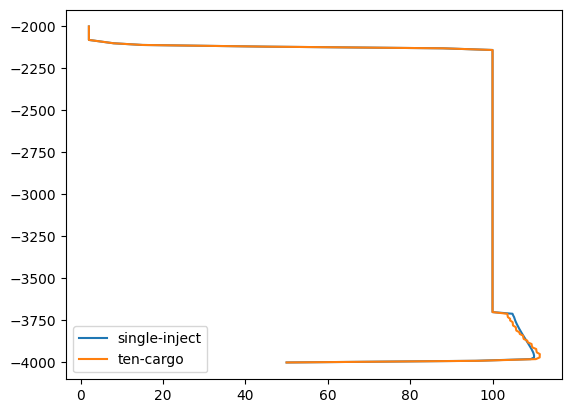

In [19]:
plt.plot( resultsCmdLine.radius.iloc[:,-1],-resultsCmdLine.depths, label='single-inject')
plt.plot( tenCargoResults.radius.iloc[:,-1],-tenCargoResults.depths, label='ten-cargo')
plt.legend()

These shapes are similar, but as expected, the ten-cargo method has a different slope since it has time to leach between stages. We can see this better by zooming in.

(90.0, 120.0)

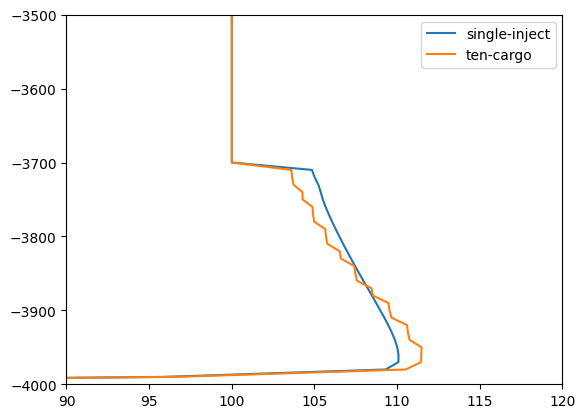

In [20]:
plt.plot( resultsCmdLine.radius.iloc[:,-1],-resultsCmdLine.depths, label='single-inject')
plt.plot( tenCargoResults.radius.iloc[:,-1],-tenCargoResults.depths, label='ten-cargo')
plt.legend()
plt.ylim(-4000, -3500)
plt.xlim(90,120)

Hopefully this has been a useful introduction to using the new version of sansmic! There will be an additional notebook that compares the old FORTRAN code results with the new results soon.